In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Loading data

In [34]:
train_file = pd.read_csv('train_file.csv')
test_file = pd.read_csv('test_file.csv')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
train_file.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION,LICENSE STATUS
0,35342-20020816,1256593,32811,1,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,2625 S CENTRAL PARK AVE 1,CHICAGO,IL,60623.0,...,2002-08-16T00:00:00,2003-08-15T00:00:00,2002-08-21T00:00:00,2006-04-11T00:00:00,NaN,25.0,41.843613,-87.714618,"{'latitude': '41.843612879431845', 'longitude'...",AAI
1,1358463-20051116,1639294,262311,29,"ISLA TROPICAL, INC.",ISLA TROPICAL,2825 W MONTROSE AVE,CHICAGO,IL,60618,...,2005-11-16T00:00:00,2006-11-15T00:00:00,2006-04-05T00:00:00,2006-06-12T00:00:00,2006-06-15T00:00:00,60.0,41.961132,-87.699626,"{'latitude': '41.96113244107215', 'longitude':...",AAC
2,1980233-20090722,1980233,345008,1,DJS REMODELING,"DJS REMODELING, INC.",1605 CLAVEY RD 1,HIGHLAND,IL,60035,...,2009-07-22T00:00:00,2011-07-15T00:00:00,2009-07-22T00:00:00,2009-07-22T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
3,1476582-20040211,1476582,273121,1,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,8 NORTH TRAIL,LEMONT,IL,60439,...,2004-02-11T00:00:00,2005-02-15T00:00:00,2004-02-10T00:00:00,2004-02-11T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI
4,1141408-20080516,1896750,213785,1,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,4081 JOSEPH DR,WAUKEGAN,IL,60087,...,2008-05-16T00:00:00,2010-05-15T00:00:00,2008-06-04T00:00:00,2008-06-05T00:00:00,NaN,NaN,NaN,NaN,NaN,AAI


In [39]:
test_file.head()

,ID,LICENSE ID,ACCOUNT NUMBER,SITE NUMBER,LEGAL NAME,DOING BUSINESS AS NAME,ADDRESS,CITY,STATE,ZIP CODE,...,CONDITIONAL APPROVAL,LICENSE TERM START DATE,LICENSE TERM EXPIRATION DATE,LICENSE APPROVED FOR ISSUANCE,DATE ISSUED,LICENSE STATUS CHANGE DATE,SSA,LATITUDE,LONGITUDE,LOCATION
0,1516615-20120216,2132209,280120,1,RS HOMES I LLC,RS HOMES I LLC,350 W HUBBARD ST 3 300,CHICAGO,IL,60610.0,...,N,2012-02-16T00:00:00,2014-02-15T00:00:00,2012-01-19T00:00:00,2012-01-20T00:00:00,2012-12-29T00:00:00,NaN,41.890047,-87.637467,"{'latitude': '41.89004724888915', 'longitude':..."
1,69813-20110616,2090759,65043,1,CSX INTERMODAL INC,CSX INTERMODAL,2101 W 59TH ST 1ST,CHICAGO,IL,60636.0,...,N,2011-06-16T00:00:00,2013-06-15T00:00:00,2012-11-02T00:00:00,2012-11-05T00:00:00,2012-12-29T00:00:00,NaN,41.786485,-87.676665,"{'latitude': '41.786485235679486', 'longitude'..."
2,1519227-20041116,1541990,281270,1,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,1133 S WABASH AVE 1ST,CHICAGO,IL,60605.0,...,N,2004-11-16T00:00:00,2005-11-15T00:00:00,2004-12-06T00:00:00,2004-12-07T00:00:00,NaN,NaN,41.868269,-87.625695,"{'latitude': '41.86826924843568', 'longitude':..."
3,1922025-20100816,2041053,335243,1,ANNA F. JAMISON,ANNA F. JAMISON,13156 S FORRESTVILLE AVE,CHICAGO,IL,60827.0,...,N,2010-08-16T00:00:00,2012-08-15T00:00:00,NaN,2010-11-04T00:00:00,2012-12-31T00:00:00,NaN,41.655762,-87.608686,"{'latitude': '41.65576175146191', 'longitude':..."
4,1675683-20070816,1837158,283018,3,MARINCA A. COVARRUBIAS,DETAILS,4208 S ARCHER AVE,CHICAGO,IL,60632.0,...,N,2007-08-16T00:00:00,2009-06-15T00:00:00,2007-08-15T00:00:00,2007-08-16T00:00:00,2008-03-26T00:00:00,39.0,41.816969,-87.699785,"{'latitude': '41.81696910012824', 'longitude':..."


In [48]:
print("Train File Shape-",train_file.shape)
print("Test File Shape-",test_file.shape)

Train File Shape- (85895, 32)
Test File Shape- (57239, 31)


In [50]:
print("Columns in Train File-",train_file.columns)
print("==========================================")
print("Columns in Test File-",test_file.columns)

Columns in Train File- Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')
Columns in Test File- Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
     

In [254]:
print(train_file.isna().sum())
print("-----------------DTYPES-----------------------")
print(train_file.dtypes)
print("------------------UNIQUES---------------------")
print(train_file.nunique())

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION CREATED DATE             64660
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TER

In [52]:
test_file.isna().sum()

ID                                       0
LICENSE ID                               0
ACCOUNT NUMBER                           0
SITE NUMBER                              0
LEGAL NAME                               0
DOING BUSINESS AS NAME                   2
ADDRESS                                  0
CITY                                     0
STATE                                    0
ZIP CODE                                12
WARD                                   626
PRECINCT                              1578
WARD PRECINCT                          616
POLICE DISTRICT                       1475
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION CREATED DATE             44587
APPLICATION REQUIREMENTS COMPLETE      428
PAYMENT DATE                          1051
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                118
LICENSE TER

In [54]:
train_file['LICENSE STATUS'].value_counts()

AAI    55400
AAC    30200
REV      290
REA        3
INQ        2
Name: LICENSE STATUS, dtype: int64

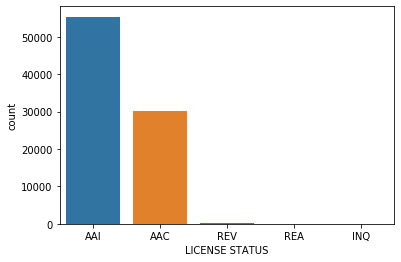

In [56]:
sns.countplot(train_file['LICENSE STATUS'])

In [60]:
train_file.columns

Index(['ID', 'LICENSE ID', 'ACCOUNT NUMBER', 'SITE NUMBER', 'LEGAL NAME',
       'DOING BUSINESS AS NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION CREATED DATE', 'APPLICATION REQUIREMENTS COMPLETE',
       'PAYMENT DATE', 'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'SSA', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'LICENSE STATUS'],
      dtype='object')

In [64]:
training_data = train_file.drop(['ID','LICENSE ID','ACCOUNT NUMBER','SITE NUMBER','ADDRESS',
                                 'SSA','APPLICATION CREATED DATE','LOCATION'],axis=1)

In [65]:
testing_data = test_file.drop(['ID','LICENSE ID','ACCOUNT NUMBER','SITE NUMBER','ADDRESS',
                                 'SSA','APPLICATION CREATED DATE','LOCATION'],axis=1)

In [70]:
print("Train File Shape-",training_data.shape)
print("Test File Shape-",testing_data.shape)

Train File Shape- (85895, 24)
Test File Shape- (57239, 23)


In [80]:
print(training_data.isna().sum())
print(training_data.dtypes)

LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                 49701
PRECINCT                             56701
WARD PRECINCT                        49700
POLICE DISTRICT                      54012
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           1
APPLICATION TYPE                         0
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TERM EXPIRATION DATE            18
LICENSE APPROVED FOR ISSUANCE         6789
DATE ISSUED                              0
LICENSE STATUS CHANGE DATE           55400
LATITUDE                                 0
LONGITUDE                                0
LICENSE STA

In [67]:
training_data.dtypes

LEGAL NAME                            object
DOING BUSINESS AS NAME                object
CITY                                  object
STATE                                 object
ZIP CODE                              object
WARD                                 float64
PRECINCT                             float64
WARD PRECINCT                         object
POLICE DISTRICT                      float64
LICENSE CODE                           int64
LICENSE DESCRIPTION                   object
LICENSE NUMBER                       float64
APPLICATION TYPE                      object
APPLICATION REQUIREMENTS COMPLETE     object
PAYMENT DATE                          object
CONDITIONAL APPROVAL                  object
LICENSE TERM START DATE               object
LICENSE TERM EXPIRATION DATE          object
LICENSE APPROVED FOR ISSUANCE         object
DATE ISSUED                           object
LICENSE STATUS CHANGE DATE            object
LATITUDE                             float64
LONGITUDE 

In [81]:
training_data['LATITUDE'] = training_data['LATITUDE'].fillna(training_data['LATITUDE'].mean())
training_data['LONGITUDE'] = training_data['LONGITUDE'].fillna(training_data['LONGITUDE'].mean())
testing_data['LATITUDE'] = testing_data['LATITUDE'].fillna(testing_data['LATITUDE'].mean())
testing_data['LONGITUDE'] = testing_data['LONGITUDE'].fillna(testing_data['LONGITUDE'].mean())

In [82]:
def impute_with_zero(col_list):
    for i in col_list:
        training_data[i]=training_data[i].fillna(0)
        testing_data[i]=testing_data[i].fillna(0)

In [83]:
col_list=['WARD','PRECINCT','POLICE DISTRICT','LICENSE NUMBER','WARD PRECINCT',]
impute_with_zero(col_list)

In [85]:
print(training_data.isna().sum())
print(training_data.dtypes)

LEGAL NAME                               0
DOING BUSINESS AS NAME                   1
CITY                                     0
STATE                                    0
ZIP CODE                                31
WARD                                     0
PRECINCT                                 0
WARD PRECINCT                            0
POLICE DISTRICT                          0
LICENSE CODE                             0
LICENSE DESCRIPTION                      0
LICENSE NUMBER                           0
APPLICATION TYPE                         0
APPLICATION REQUIREMENTS COMPLETE      214
PAYMENT DATE                          1289
CONDITIONAL APPROVAL                     0
LICENSE TERM START DATE                228
LICENSE TERM EXPIRATION DATE            18
LICENSE APPROVED FOR ISSUANCE         6789
DATE ISSUED                              0
LICENSE STATUS CHANGE DATE           55400
LATITUDE                                 0
LONGITUDE                                0
LICENSE STA

In [86]:
def convert_to_datetime(col_list):
    for i in col_list:
        training_data[i]=pd.to_datetime(training_data[i])
        testing_data[i]=pd.to_datetime(testing_data[i])

In [87]:
training_data.columns

Index(['LEGAL NAME', 'DOING BUSINESS AS NAME', 'CITY', 'STATE', 'ZIP CODE',
       'WARD', 'PRECINCT', 'WARD PRECINCT', 'POLICE DISTRICT', 'LICENSE CODE',
       'LICENSE DESCRIPTION', 'LICENSE NUMBER', 'APPLICATION TYPE',
       'APPLICATION REQUIREMENTS COMPLETE', 'PAYMENT DATE',
       'CONDITIONAL APPROVAL', 'LICENSE TERM START DATE',
       'LICENSE TERM EXPIRATION DATE', 'LICENSE APPROVED FOR ISSUANCE',
       'DATE ISSUED', 'LICENSE STATUS CHANGE DATE', 'LATITUDE', 'LONGITUDE',
       'LICENSE STATUS'],
      dtype='object')

In [92]:
date_col_list=['APPLICATION REQUIREMENTS COMPLETE','PAYMENT DATE','LICENSE TERM START DATE',
              'LICENSE TERM EXPIRATION DATE','LICENSE APPROVED FOR ISSUANCE','DATE ISSUED',
               'LICENSE STATUS CHANGE DATE']

In [93]:
convert_to_datetime(date_col_list)

In [95]:
def fetch_year_month(colname1,colname2,date_col):
    training_data[colname1]=training_data[date_col].apply(lambda value : value.year)
    training_data[colname2]=training_data[date_col].apply(lambda value : value.month)
    testing_data[colname1]=testing_data[date_col].apply(lambda value : value.year)
    testing_data[colname2]=testing_data[date_col].apply(lambda value : value.month)

In [99]:
def fetch_year(colname1,date_col):
    training_data[colname1]=training_data[date_col].apply(lambda value : value.year)
    testing_data[colname1]=testing_data[date_col].apply(lambda value : value.year)

In [97]:
fetch_year_month('PAYMENT YEAR','PAYMENT MONTH','PAYMENT DATE')

In [101]:
fetch_year('APPLICATION REQUIREMENTS COMPLETE YEAR','APPLICATION REQUIREMENTS COMPLETE')
fetch_year('LICENSE TERM START YEAR','LICENSE TERM START DATE')
fetch_year('LICENSE TERM EXPIRATION YEAR','LICENSE TERM EXPIRATION DATE')
fetch_year('LICENSE APPROVAL YEAR','LICENSE APPROVED FOR ISSUANCE')
fetch_year('DATE ISSUED YEAR','DATE ISSUED')
fetch_year('LICENSE STATUS CHANGE YEAR','LICENSE STATUS CHANGE DATE')

In [102]:
training_data.head()

,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,LICENSE TERM START YEAR,LICENSE TERM EXPIRATION YEAR,LICENSE APPROVAL YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR
0,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,...,-87.714618,AAI,2002.0,8.0,2002.0,2002.0,2003.0,2002.0,2006,NaN
1,"ISLA TROPICAL, INC.",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,...,-87.699626,AAC,2005.0,11.0,2005.0,2005.0,2006.0,2006.0,2006,2006.0
2,DJS REMODELING,"DJS REMODELING, INC.",HIGHLAND,IL,60035,0.0,0.0,0,0.0,1011,...,-87.681165,AAI,2009.0,7.0,2009.0,2009.0,2011.0,2009.0,2009,NaN
3,ALL-BRY CONSTRUCTION CO.,ALL-BRY CONSTRUCTION CO.,LEMONT,IL,60439,0.0,0.0,0,0.0,1010,...,-87.681165,AAI,2004.0,2.0,2004.0,2004.0,2005.0,2004.0,2004,NaN
4,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,0.0,0.0,0,0.0,1010,...,-87.681165,AAI,2008.0,6.0,2008.0,2008.0,2010.0,2008.0,2008,NaN


In [108]:
training_data.isna().sum()
#(training_data.dtypes)

LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                          0
PRECINCT                                      0
WARD PRECINCT                                 0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                0
APPLICATION TYPE                              0
APPLICATION REQUIREMENTS COMPLETE           214
PAYMENT DATE                               1289
CONDITIONAL APPROVAL                          0
LICENSE TERM START DATE                     228
LICENSE TERM EXPIRATION DATE                 18
LICENSE APPROVED FOR ISSUANCE              6789
DATE ISSUED                                   0
LICENSE STATUS CHANGE DATE              

In [109]:
imputation_list = ['LICENSE STATUS CHANGE YEAR','LICENSE APPROVAL YEAR','LICENSE TERM EXPIRATION YEAR',
                   'LICENSE TERM START YEAR','APPLICATION REQUIREMENTS COMPLETE YEAR','PAYMENT YEAR']

In [111]:
impute_with_zero(['PAYMENT MONTH'])

In [112]:
for i in imputation_list:
    training_data[i] = training_data[i].fillna(round(training_data[i].mean()))

In [113]:
for i in imputation_list:
    testing_data[i] = testing_data[i].fillna(round(testing_data[i].mean()))

In [114]:
training_data.isna().sum()

LEGAL NAME                                    0
DOING BUSINESS AS NAME                        1
CITY                                          0
STATE                                         0
ZIP CODE                                     31
WARD                                          0
PRECINCT                                      0
WARD PRECINCT                                 0
POLICE DISTRICT                               0
LICENSE CODE                                  0
LICENSE DESCRIPTION                           0
LICENSE NUMBER                                0
APPLICATION TYPE                              0
APPLICATION REQUIREMENTS COMPLETE           214
PAYMENT DATE                               1289
CONDITIONAL APPROVAL                          0
LICENSE TERM START DATE                     228
LICENSE TERM EXPIRATION DATE                 18
LICENSE APPROVED FOR ISSUANCE              6789
DATE ISSUED                                   0
LICENSE STATUS CHANGE DATE              

In [115]:
training_data['LICENSE TENURE'] = abs(training_data['LICENSE TERM EXPIRATION YEAR'] - training_data['LICENSE TERM START YEAR'])

In [116]:
testing_data['LICENSE TENURE'] = abs(testing_data['LICENSE TERM EXPIRATION YEAR'] - testing_data['LICENSE TERM START YEAR'])

In [120]:
training_data.dtypes

LEGAL NAME                                        object
DOING BUSINESS AS NAME                            object
CITY                                              object
STATE                                             object
ZIP CODE                                          object
WARD                                             float64
PRECINCT                                         float64
WARD PRECINCT                                     object
POLICE DISTRICT                                  float64
LICENSE CODE                                       int64
LICENSE DESCRIPTION                               object
LICENSE NUMBER                                   float64
APPLICATION TYPE                                  object
APPLICATION REQUIREMENTS COMPLETE         datetime64[ns]
PAYMENT DATE                              datetime64[ns]
CONDITIONAL APPROVAL                              object
LICENSE TERM START DATE                   datetime64[ns]
LICENSE TERM EXPIRATION DATE   

In [121]:
drop_col_list = ['PAYMENT DATE','APPLICATION REQUIREMENTS COMPLETE','LICENSE TERM EXPIRATION DATE','DATE ISSUED',
                'LICENSE TERM EXPIRATION YEAR','LICENSE TERM START DATE','LICENSE TERM START YEAR',
                'LICENSE APPROVED FOR ISSUANCE','LICENSE STATUS CHANGE DATE']

In [126]:
#training_data.drop(drop_col_list,axis=1,inplace=True)
testing_data.drop(drop_col_list,axis=1,inplace=True)

In [130]:
training_data.isna().sum()

LEGAL NAME                                 0
DOING BUSINESS AS NAME                     1
CITY                                       0
STATE                                      0
ZIP CODE                                  31
WARD                                       0
PRECINCT                                   0
WARD PRECINCT                              0
POLICE DISTRICT                            0
LICENSE CODE                               0
LICENSE DESCRIPTION                        0
LICENSE NUMBER                             0
APPLICATION TYPE                           0
CONDITIONAL APPROVAL                       0
LATITUDE                                   0
LONGITUDE                                  0
LICENSE STATUS                             0
PAYMENT YEAR                               0
PAYMENT MONTH                              0
APPLICATION REQUIREMENTS COMPLETE YEAR     0
LICENSE APPROVAL YEAR                      0
DATE ISSUED YEAR                           0
LICENSE ST

In [131]:
training_data['ZIP CODE'] = training_data["ZIP CODE"].fillna('None')
testing_data['ZIP CODE'] = testing_data["ZIP CODE"].fillna('None')
training_data['DOING BUSINESS AS NAME'] = training_data["DOING BUSINESS AS NAME"].fillna('None')
testing_data['DOING BUSINESS AS NAME'] = testing_data["DOING BUSINESS AS NAME"].fillna('None')

In [132]:
training_data.isna().sum()

LEGAL NAME                                0
DOING BUSINESS AS NAME                    0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
LICENSE STATUS                            0
PAYMENT YEAR                              0
PAYMENT MONTH                             0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
LICENSE APPROVAL YEAR                     0
DATE ISSUED YEAR                          0
LICENSE STATUS CHANGE YEAR      

In [137]:
training_data.shape

(85895, 24)

In [138]:
testing_data.shape

(57239, 23)

In [142]:
def clean_cols(cols):
    for i in cols:
        training_data[i] = training_data[i].apply(lambda string:string.upper())
        training_data[i] = training_data[i].str.replace("."," ",regex=False)
        testing_data[i] = testing_data[i].apply(lambda string:string.upper())
        testing_data[i] = testing_data[i].str.replace("."," ",regex=False)

In [144]:
cols = ['LEGAL NAME','DOING BUSINESS AS NAME']
clean_cols(cols)

In [146]:
training_data.shape

(85895, 24)

In [147]:
training_data['BUSINESS TYPE'] = 'PRIVATE'
testing_data['BUSINESS TYPE'] = 'PRIVATE'

In [148]:
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('INC'),'INCO',training_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('INCORPORATED'),'INCO',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('INC'),'INCO',testing_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('INCORPORATED'),'INCO',testing_data['BUSINESS TYPE'])

In [149]:
training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('INC'),'INCO',training_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'),'INCO',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('INC'),'INCO',testing_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('INCORPORATED'),'INCO',testing_data['BUSINESS TYPE'])

In [150]:
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('LLC'),'LLC',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('LLC'),'LLC',testing_data['BUSINESS TYPE'])

training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('LLC'),'LLC',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('LLC'),'LLC',testing_data['BUSINESS TYPE'])

In [151]:
training_data.head()

,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,LICENSE APPROVAL YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE TENURE,BUSINESS TYPE
0,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,...,-87.714618,AAI,2002.0,8.0,2002.0,2002.0,2006,2009.0,1.0,PRIVATE
1,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,...,-87.699626,AAC,2005.0,11.0,2005.0,2006.0,2006,2006.0,1.0,INCO
2,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,IL,60035,0.0,0.0,0,0.0,1011,...,-87.681165,AAI,2009.0,7.0,2009.0,2009.0,2009,2009.0,2.0,INCO
3,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,IL,60439,0.0,0.0,0,0.0,1010,...,-87.681165,AAI,2004.0,2.0,2004.0,2004.0,2004,2009.0,1.0,PRIVATE
4,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,0.0,0.0,0,0.0,1010,...,-87.681165,AAI,2008.0,6.0,2008.0,2008.0,2008,2009.0,2.0,PRIVATE


In [152]:
testing_data.head()

,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,LICENSE APPROVAL YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE TENURE,BUSINESS TYPE
0,RS HOMES I LLC,RS HOMES I LLC,CHICAGO,IL,60610,42.0,67.0,42-67,18.0,1020,...,41.890047,-87.637467,2012.0,1.0,2011.0,2012.0,2012,2012.0,2.0,LLC
1,CSX INTERMODAL INC,CSX INTERMODAL,CHICAGO,IL,60636,16.0,5.0,16-5,7.0,1010,...,41.786485,-87.676665,2012.0,11.0,2011.0,2012.0,2012,2012.0,2.0,INCO
2,LOCOMIBILE LOFTS LLC,LOCOMOBILE LOFTS LLC,CHICAGO,IL,60605,4.0,8.0,4-8,1.0,1020,...,41.868269,-87.625695,2004.0,12.0,2004.0,2004.0,2004,2011.0,1.0,LLC
3,ANNA F JAMISON,ANNA F JAMISON,CHICAGO,IL,60827,9.0,33.0,9-33,5.0,1607,...,41.655762,-87.608686,2010.0,11.0,2010.0,2008.0,2010,2012.0,2.0,PRIVATE
4,MARINCA A COVARRUBIAS,DETAILS,CHICAGO,IL,60632,15.0,26.0,15-26,9.0,1010,...,41.816969,-87.699785,2007.0,8.0,2007.0,2007.0,2007,2008.0,2.0,INCO


In [153]:
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('CO'),'CORP',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('CO'),'CORP',testing_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('CORPORATION'),'CORP',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('CORPORATION'),'CORP',testing_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('CORP'),'CORP',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('CORP'),'CORP',testing_data['BUSINESS TYPE'])



training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('CO'),'CORP',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('CO'),'CORP',testing_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'),'CORP',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('CORPORATION'),'CORP',testing_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('CORP'),'CORP',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('CORP'),'CORP',testing_data['BUSINESS TYPE'])

In [154]:
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('LTD'),'LIMITED',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('LIMITED'),'LIMITED',testing_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['LEGAL NAME'].str.contains('LTD'),'LIMITED',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['LEGAL NAME'].str.contains('LIMITED'),'LIMITED',testing_data['BUSINESS TYPE'])


training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('LTD'),'LIMITED',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'),'LIMITED',testing_data['BUSINESS TYPE'])
training_data['BUSINESS TYPE'] = np.where(training_data['DOING BUSINESS AS NAME'].str.contains('LTD'),'LIMITED',training_data['BUSINESS TYPE'])
testing_data['BUSINESS TYPE'] = np.where(testing_data['DOING BUSINESS AS NAME'].str.contains('LIMITED'),'LIMITED',testing_data['BUSINESS TYPE'])


In [155]:
training_data.head()

,LEGAL NAME,DOING BUSINESS AS NAME,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,LICENSE APPROVAL YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE TENURE,BUSINESS TYPE
0,CARMEN CAHUE,CLAUDIA'S BRIDAL SHOP,CHICAGO,IL,60623.0,22.0,28.0,22-28,10.0,1010,...,-87.714618,AAI,2002.0,8.0,2002.0,2002.0,2006,2009.0,1.0,PRIVATE
1,"ISLA TROPICAL, INC",ISLA TROPICAL,CHICAGO,IL,60618,33.0,23.0,33-23,17.0,1315,...,-87.699626,AAC,2005.0,11.0,2005.0,2006.0,2006,2006.0,1.0,INCO
2,DJS REMODELING,"DJS REMODELING, INC",HIGHLAND,IL,60035,0.0,0.0,0,0.0,1011,...,-87.681165,AAI,2009.0,7.0,2009.0,2009.0,2009,2009.0,2.0,INCO
3,ALL-BRY CONSTRUCTION CO,ALL-BRY CONSTRUCTION CO,LEMONT,IL,60439,0.0,0.0,0,0.0,1010,...,-87.681165,AAI,2004.0,2.0,2004.0,2004.0,2004,2009.0,1.0,CORP
4,MCDONOUGH MECHANICAL SERVICE,MCDONOUGH MECHANICAL SERVICE,WAUKEGAN,IL,60087,0.0,0.0,0,0.0,1010,...,-87.681165,AAI,2008.0,6.0,2008.0,2008.0,2008,2009.0,2.0,PRIVATE


In [156]:
training_data.isna().sum()

LEGAL NAME                                0
DOING BUSINESS AS NAME                    0
CITY                                      0
STATE                                     0
ZIP CODE                                  0
WARD                                      0
PRECINCT                                  0
WARD PRECINCT                             0
POLICE DISTRICT                           0
LICENSE CODE                              0
LICENSE DESCRIPTION                       0
LICENSE NUMBER                            0
APPLICATION TYPE                          0
CONDITIONAL APPROVAL                      0
LATITUDE                                  0
LONGITUDE                                 0
LICENSE STATUS                            0
PAYMENT YEAR                              0
PAYMENT MONTH                             0
APPLICATION REQUIREMENTS COMPLETE YEAR    0
LICENSE APPROVAL YEAR                     0
DATE ISSUED YEAR                          0
LICENSE STATUS CHANGE YEAR      

In [158]:
training_data['BUSINESS TYPE'].value_counts()

CORP       29290
INCO       25909
PRIVATE    24900
LLC         4563
LIMITED     1233
Name: BUSINESS TYPE, dtype: int64

In [160]:
training_data = training_data.drop(['LEGAL NAME','DOING BUSINESS AS NAME'],axis=1)


In [161]:
testing_data = testing_data.drop(['LEGAL NAME','DOING BUSINESS AS NAME'],axis = 1)

In [162]:
testing_data.shape

(57239, 22)

In [163]:
training_data.shape

(85895, 23)

In [164]:
training_data.dtypes

CITY                                       object
STATE                                      object
ZIP CODE                                   object
WARD                                      float64
PRECINCT                                  float64
WARD PRECINCT                              object
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
LICENSE NUMBER                            float64
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
LATITUDE                                  float64
LONGITUDE                                 float64
LICENSE STATUS                             object
PAYMENT YEAR                              float64
PAYMENT MONTH                             float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
LICENSE APPROVAL YEAR                     float64
DATE ISSUED YEAR                            int64


In [165]:
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Bike Repair')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Bike Repair')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Bike Repair')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
training_data['LICENSE DESCRIPTION'] = training_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [166]:
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair : Engine Only (Class II)', 'Bike Repair')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair: Engine/Body(Class III)', 'Bike Repair')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Motor Vehicle Repair; Specialty(Class I)', 'Bike Repair')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 Years', 'Day Care Center')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Day Care Center 2 - 6 Years', 'Day Care Center')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Day Care Center Under 2 and 2 - 6 Years', 'Day Care Center')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Peddler, non-food', 'Peddler')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Peddler, non-food, special', 'Peddler')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Peddler, food (fruits and vegtables only)', 'Peddler')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Peddler,food - (fruits and vegetables only) - special', 'Peddler')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Tire Facilty Class I (100 - 1,000 Tires)', 'Tire Facilty')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Tire Facility Class II (1,001 - 5,000 Tires)', 'Tire Facilty')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Tire Facility Class III (5,001 - More Tires)', 'Tire Facilty')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Repossessor Class A', 'Repossessor')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Repossessor Class B', 'Repossessor')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Repossessor Class B Employee', 'Repossessor')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Expediter - Class B', 'Expediter')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Expediter - Class A', 'Expediter')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Expediter - Class B Employee', 'Expediter')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class II', 'Itinerant Merchant')
testing_data['LICENSE DESCRIPTION'] = testing_data['LICENSE DESCRIPTION'].replace('Itinerant Merchant, Class I', 'Itinerant Merchant')

In [167]:
target_enc={'AAI':0,'AAC':1,'REV':2,'REA':3,'INQ':4}

In [169]:
training_data['LICENSE STATUS']=training_data['LICENSE STATUS'].map(target_enc)

In [170]:
training_data['LICENSE STATUS'].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [176]:
def label_enc(data):
    for i in data.columns:
        if data[i].dtypes=='object':
            print(i)
            mask=~data[i].isnull()
            label_enc=LabelEncoder()
            try:
                data[i][mask]=label_enc.fit_transform(data[i][mask])
                data[i]=data[i].astype(int)
            except Exception as e:
                print("Exception occured", e)
    return data

In [177]:
training_data = label_enc(training_data)

ZIP CODE
Exception occured argument must be a string or number
WARD PRECINCT
Exception occured argument must be a string or number


In [178]:
training_data.head()

,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,...,LONGITUDE,LICENSE STATUS,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,LICENSE APPROVAL YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE TENURE,BUSINESS TYPE
0,193,16,60623.0,22.0,28.0,22-28,10.0,1010,42,35342.0,...,-87.714618,0,2002.0,8.0,2002.0,2002.0,2006,2009.0,1.0,4
1,193,16,60618,33.0,23.0,33-23,17.0,1315,47,1358463.0,...,-87.699626,1,2005.0,11.0,2005.0,2006.0,2006,2006.0,1.0,1
2,466,16,60035,0.0,0.0,0,0.0,1011,31,1980233.0,...,-87.681165,0,2009.0,7.0,2009.0,2009.0,2009,2009.0,2.0,1
3,585,16,60439,0.0,0.0,0,0.0,1010,42,1476582.0,...,-87.681165,0,2004.0,2.0,2004.0,2004.0,2004,2009.0,1.0,0
4,1145,16,60087,0.0,0.0,0,0.0,1010,42,1141408.0,...,-87.681165,0,2008.0,6.0,2008.0,2008.0,2008,2009.0,2.0,4


In [179]:
testing_data.dtypes

CITY                                       object
STATE                                      object
ZIP CODE                                   object
WARD                                      float64
PRECINCT                                  float64
WARD PRECINCT                              object
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
LICENSE NUMBER                            float64
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
LATITUDE                                  float64
LONGITUDE                                 float64
PAYMENT YEAR                              float64
PAYMENT MONTH                             float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
LICENSE APPROVAL YEAR                     float64
DATE ISSUED YEAR                            int64
LICENSE STATUS CHANGE YEAR                float64


In [180]:
testing_data.head()

,CITY,STATE,ZIP CODE,WARD,PRECINCT,WARD PRECINCT,POLICE DISTRICT,LICENSE CODE,LICENSE DESCRIPTION,LICENSE NUMBER,...,LATITUDE,LONGITUDE,PAYMENT YEAR,PAYMENT MONTH,APPLICATION REQUIREMENTS COMPLETE YEAR,LICENSE APPROVAL YEAR,DATE ISSUED YEAR,LICENSE STATUS CHANGE YEAR,LICENSE TENURE,BUSINESS TYPE
0,CHICAGO,IL,60610,42.0,67.0,42-67,18.0,1020,Residential Real Estate Developer,1516615.0,...,41.890047,-87.637467,2012.0,1.0,2011.0,2012.0,2012,2012.0,2.0,LLC
1,CHICAGO,IL,60636,16.0,5.0,16-5,7.0,1010,Limited Business License,69813.0,...,41.786485,-87.676665,2012.0,11.0,2011.0,2012.0,2012,2012.0,2.0,INCO
2,CHICAGO,IL,60605,4.0,8.0,4-8,1.0,1020,Residential Real Estate Developer,1519227.0,...,41.868269,-87.625695,2004.0,12.0,2004.0,2004.0,2004,2011.0,1.0,CORP
3,CHICAGO,IL,60827,9.0,33.0,9-33,5.0,1607,Peddler,1922025.0,...,41.655762,-87.608686,2010.0,11.0,2010.0,2008.0,2010,2012.0,2.0,PRIVATE
4,CHICAGO,IL,60632,15.0,26.0,15-26,9.0,1010,Limited Business License,1675683.0,...,41.816969,-87.699785,2007.0,8.0,2007.0,2007.0,2007,2008.0,2.0,CORP


In [181]:
labelEnc = LabelEncoder()
training_data['ZIP CODE'] = labelEnc.fit_transform(training_data['ZIP CODE'].astype(str))
testing_data['ZIP CODE'] = labelEnc.fit_transform(testing_data['ZIP CODE'].astype(str))
training_data['WARD PRECINCT'] = labelEnc.fit_transform(training_data['WARD PRECINCT'].astype(str))
testing_data['WARD PRECINCT'] = labelEnc.fit_transform(testing_data['WARD PRECINCT'].astype(str))

In [293]:
training_data['LICENSE STATUS'].value_counts()

0    55400
1    30200
2      290
3        3
4        2
Name: LICENSE STATUS, dtype: int64

In [183]:
testing_data.dtypes

CITY                                       object
STATE                                      object
ZIP CODE                                    int64
WARD                                      float64
PRECINCT                                  float64
WARD PRECINCT                               int64
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                        object
LICENSE NUMBER                            float64
APPLICATION TYPE                           object
CONDITIONAL APPROVAL                       object
LATITUDE                                  float64
LONGITUDE                                 float64
PAYMENT YEAR                              float64
PAYMENT MONTH                             float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
LICENSE APPROVAL YEAR                     float64
DATE ISSUED YEAR                            int64
LICENSE STATUS CHANGE YEAR                float64


In [184]:
testing_data = label_enc(testing_data)

CITY
STATE
LICENSE DESCRIPTION
APPLICATION TYPE
CONDITIONAL APPROVAL
BUSINESS TYPE


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [186]:
testing_data.dtypes

CITY                                        int64
STATE                                       int64
ZIP CODE                                    int64
WARD                                      float64
PRECINCT                                  float64
WARD PRECINCT                               int64
POLICE DISTRICT                           float64
LICENSE CODE                                int64
LICENSE DESCRIPTION                         int64
LICENSE NUMBER                            float64
APPLICATION TYPE                            int64
CONDITIONAL APPROVAL                        int64
LATITUDE                                  float64
LONGITUDE                                 float64
PAYMENT YEAR                              float64
PAYMENT MONTH                             float64
APPLICATION REQUIREMENTS COMPLETE YEAR    float64
LICENSE APPROVAL YEAR                     float64
DATE ISSUED YEAR                            int64
LICENSE STATUS CHANGE YEAR                float64


In [187]:
X = training_data.drop('LICENSE STATUS',axis=1)
y = training_data['LICENSE STATUS']

In [189]:
y.tail

<bound method NDFrame.tail of 0        0
1        1
2        0
3        0
4        0
        ..
85890    1
85891    0
85892    0
85893    1
85894    1
Name: LICENSE STATUS, Length: 85895, dtype: int64>

In [195]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=420)

In [196]:
from sklearn.naive_bayes import GaussianNB

In [197]:
gb = GaussianNB()

In [198]:
gb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [200]:
predictions = gb.predict(X_test)

In [204]:
print(accuracy_score(y_test,predictions)*100)

81.79172245183072


In [215]:
conf_mat = confusion_matrix(y_test,predictions,[1,0]).T
print(conf_mat)

[[5068 1979]
 [ 854 8981]]


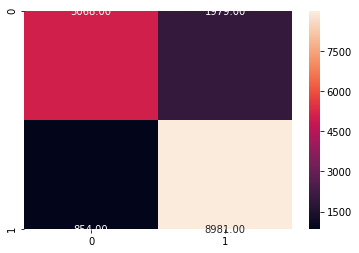

In [214]:
sns.heatmap(conf_mat,annot=True,fmt='.2f')

In [221]:
submissions = pd.DataFrame({'ID': test_file.ID})

In [242]:
submissions_test = gb.predict(testing_data)
submissions_test.shape

(57239,)

In [224]:
submissions['LICENSE STATUS'] = submissions_test

In [225]:
submissions.shape

(57239, 2)

In [228]:
submissions['LICENSE STATUS'].value_counts()

0    55745
1     1494
Name: LICENSE STATUS, dtype: int64

In [229]:
submissions['LICENSE STATUS'] = submissions['LICENSE STATUS'].replace(0, 'AAI')
submissions['LICENSE STATUS'] = submissions['LICENSE STATUS'].replace(1, 'AAC')
submissions['LICENSE STATUS'] = submissions['LICENSE STATUS'].replace(2, 'REV')
submissions['LICENSE STATUS'] = submissions['LICENSE STATUS'].replace(3, 'REA')
submissions['LICENSE STATUS'] = submissions['LICENSE STATUS'].replace(4, 'INQ')

In [231]:
submissions.to_csv('SamarSubmissions.csv',index=False)

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [281]:
rf = RandomForestClassifier(n_estimators=100)

In [282]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [283]:
rf_predictions = rf.predict(X_test)

In [284]:
print(accuracy_score(rf_predictions,y_test))

0.9893474591070494


In [285]:
rf_submissions = pd.DataFrame({'ID':test_file.ID})

In [286]:
rf_test = rf.predict(testing_data)

In [287]:
rf_test.shape

(57239,)

In [288]:
rf_submissions['LICENSE STATUS'] = rf_test

In [289]:
rf_submissions['LICENSE STATUS'] = rf_submissions['LICENSE STATUS'].replace(0, 'AAI')
rf_submissions['LICENSE STATUS'] = rf_submissions['LICENSE STATUS'].replace(1, 'AAC')
rf_submissions['LICENSE STATUS'] = rf_submissions['LICENSE STATUS'].replace(2, 'REV')
rf_submissions['LICENSE STATUS'] = rf_submissions['LICENSE STATUS'].replace(3, 'REA')
rf_submissions['LICENSE STATUS'] = rf_submissions['LICENSE STATUS'].replace(4, 'INQ')

In [290]:
rf_submissions['LICENSE STATUS'].value_counts()

AAC    51495
REV     5508
AAI      236
Name: LICENSE STATUS, dtype: int64

In [291]:
rf_submissions.to_csv('RandomForestSubmissions.csv',index=False)

In [255]:
from sklearn.ensemble import GradientBoostingClassifier

In [256]:
xg_boost = GradientBoostingClassifier()

In [257]:
xg_boost.fit(X_test,y_test)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [258]:
xg_boost_preds = xg_boost.predict(X_test)

In [262]:
print(accuracy_score(y_test,xg_boost_preds)*100)

99.36550439490075


In [263]:
xg_boost_test = xg_boost.predict(testing_data)

In [264]:
xg_boost_test

array([1, 1, 1, ..., 1, 1, 1])

In [265]:
xg_boost_submissions = pd.DataFrame({'ID':test_file.ID})

In [266]:
xg_boost_submissions['LICENSE STATUS'] = xg_boost_test

In [267]:
xg_boost_submissions.shape

(57239, 2)

In [270]:
xg_boost_submissions["LICENSE STATUS"].value_counts()

1    49241
2     7835
0      151
3       12
Name: LICENSE STATUS, dtype: int64

In [271]:
xg_boost_submissions['LICENSE STATUS'] = xg_boost_submissions['LICENSE STATUS'].replace(0, 'AAI')
xg_boost_submissions['LICENSE STATUS'] = xg_boost_submissions['LICENSE STATUS'].replace(1, 'AAC')
xg_boost_submissions['LICENSE STATUS'] = xg_boost_submissions['LICENSE STATUS'].replace(2, 'REV')
xg_boost_submissions['LICENSE STATUS'] = xg_boost_submissions['LICENSE STATUS'].replace(3, 'REA')
xg_boost_submissions['LICENSE STATUS'] = xg_boost_submissions['LICENSE STATUS'].replace(4, 'INQ')

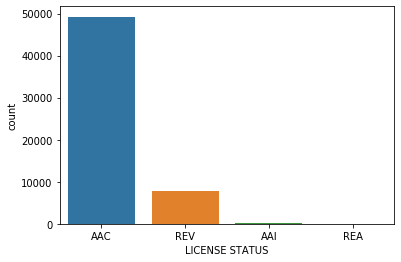

In [273]:
sns.countplot(xg_boost_submissions['LICENSE STATUS'])

In [274]:
xg_boost_submissions.to_csv('xgBoostClassifier.csv',index=False)

In [275]:
from sklearn.metrics import f1_score

In [277]:
print(f1_score(xg_boost_preds,y_test,average='micro'))

0.9936550439490075


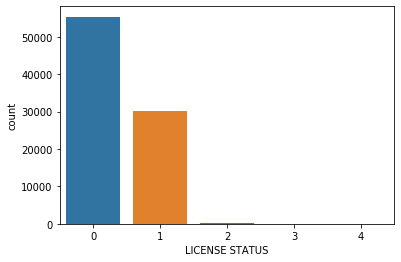

In [280]:
sns.countplot(training_data['LICENSE STATUS'])

In [294]:
training_data = training_data.sample(frac=1)

In [295]:
class4data = training_data[training_data['LICENSE STATUS'] == 4]

In [296]:
class3data = training_data[training_data['LICENSE STATUS'] == 3]

In [297]:
class2data = training_data[training_data['LICENSE STATUS'] == 2]

In [298]:
class1data = training_data[training_data['LICENSE STATUS'] == 1][:290]

In [299]:
class0data = training_data[training_data['LICENSE STATUS'] == 0][:300]

In [300]:
new_training_data = pd.concat([class4data,class3data,class2data,class1data,class0data,class4data,
                              class4data,class4data,class4data,class3data,class3data,class4data,class3data])

In [301]:
new_training_data = new_training_data.sample(frac=1,random_state=420)

In [303]:
X = new_training_data.drop('LICENSE STATUS',axis=1)
y = new_training_data['LICENSE STATUS']

In [304]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=420)

In [319]:
rf = RandomForestClassifier(n_estimators=100,random_state=420)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=420,
                       verbose=0, warm_start=False)

In [320]:
rf_test_sample_pred = rf.predict(X_test)

In [321]:
print(accuracy_score(rf_test_sample_pred,y_test))

0.8784530386740331


In [322]:
rf_submissions_new = pd.DataFrame({'ID':test_file.ID})

In [323]:
rf_final_test = rf.predict(testing_data)

In [324]:
rf_final_test.shape

(57239,)

In [325]:
rf_submissions_new['LICENSE STATUS'] = rf_final_test

In [326]:
rf_submissions_new.shape

(57239, 2)

In [327]:
rf_submissions_new['LICENSE STATUS'] = rf_submissions_new['LICENSE STATUS'].replace(0, 'AAI')
rf_submissions_new['LICENSE STATUS'] = rf_submissions_new['LICENSE STATUS'].replace(1, 'AAC')
rf_submissions_new['LICENSE STATUS'] = rf_submissions_new['LICENSE STATUS'].replace(2, 'REV')
rf_submissions_new['LICENSE STATUS'] = rf_submissions_new['LICENSE STATUS'].replace(3, 'REA')
rf_submissions_new['LICENSE STATUS'] = rf_submissions_new['LICENSE STATUS'].replace(4, 'INQ')

In [328]:
rf_submissions_new.to_csv('new_rf_submissions.csv',index=False)

In [329]:
X = new_training_data.drop('LICENSE STATUS',axis=1)
y = new_training_data['LICENSE STATUS']

In [330]:
X_train_xg,X_test_xg,y_train_xg,y_test_xg = train_test_split(X,y,test_size=0.25,random_state=420)

In [331]:
xg_boost.fit(X_train_xg,y_train_xg)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [333]:
xg_new_preds = xg_boost.predict(X_test_xg)

In [335]:
print(accuracy_score(xg_new_preds,y_test_xg)*100)

91.5929203539823


In [336]:
xg_new_submissions = xg_boost.predict(testing_data)

In [337]:
xg_new_submissions.shape

(57239,)

In [338]:
xg_submission_file = pd.DataFrame({'ID':test_file.ID,'LICENSE STATUS':xg_new_submissions})

In [339]:
xg_submission_file.shape

(57239, 2)

In [340]:
xg_submission_file['LICENSE STATUS'] = xg_submission_file['LICENSE STATUS'].replace(0, 'AAI')
xg_submission_file['LICENSE STATUS'] = xg_submission_file['LICENSE STATUS'].replace(1, 'AAC')
xg_submission_file['LICENSE STATUS'] = xg_submission_file['LICENSE STATUS'].replace(2, 'REV')
xg_submission_file['LICENSE STATUS'] = xg_submission_file['LICENSE STATUS'].replace(3, 'REA')
xg_submission_file['LICENSE STATUS'] = xg_submission_file['LICENSE STATUS'].replace(4, 'INQ')

In [341]:
xg_submission_file["LICENSE STATUS"].value_counts()

AAC    44706
REV    11134
INQ     1051
AAI      198
REA      150
Name: LICENSE STATUS, dtype: int64

In [342]:
xg_submission_file.to_csv('xgBoostClassifierNew.csv',index=False)

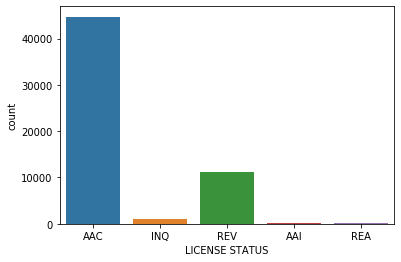

In [344]:
sns.countplot(xg_submission_file['LICENSE STATUS'])

In [345]:
from sklearn.ensemble import GradientBoostingClassifier

In [346]:
xgbclf = GradientBoostingClassifier(n_estimators=500,learning_rate=0.05)

In [348]:
xgbclf.fit(X_train_xg,y_train_xg)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [349]:
newXGBpreds = xgbclf.predict(X_test_xg)

In [350]:
accuracy_score(newXGBpreds,y_test_xg)

0.9247787610619469

In [351]:
xgbparameterTuned = xgbclf.predict(testing_data)

In [352]:
xgbNew = pd.DataFrame({'ID':test_file.ID,'LICENSE STATUS':xgbparameterTuned})

In [354]:
xgbNew['LICENSE STATUS'] = xgbNew['LICENSE STATUS'].replace(0, 'AAI')
xgbNew['LICENSE STATUS'] = xgbNew['LICENSE STATUS'].replace(1, 'AAC')
xgbNew['LICENSE STATUS'] = xgbNew['LICENSE STATUS'].replace(2, 'REV')
xgbNew['LICENSE STATUS'] = xgbNew['LICENSE STATUS'].replace(3, 'REA')
xgbNew['LICENSE STATUS'] = xgbNew['LICENSE STATUS'].replace(4, 'INQ')

In [355]:
xgbNew.to_csv('XGBOOSTParamtereTuned.csv',index=False)